In [6]:
#Part 1
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

def loadMusicData(fname, addBias):
    data = np.loadtxt("YearPredictionMSD.txt", delimiter="," )
    bias = np.array([addBias] * len(data)).reshape((len(data),1))
    temp = np.append(data,bias,axis = 1)
    alltrain = temp[:463715,:]
    alltest = temp[463715:,:]
    return alltrain[:,0], alltrain[:,1:], alltest[:,0], alltest[:, 1:]
    
trainYears, trainFeat, testYears, testFeat = loadMusicData("YearPredictionMSD.txt", 1)      

def musicMSE(x,gt):
    pd = np.rint(x)
    a = 0.0
    for i in range(len(pd)):
        sq = (pd[i] - gt[i])**2
        a += sq
    return a/len(pd)  

train_normed = trainFeat
test_normed = testFeat
train_mean = np.mean(trainFeat[:,:-1])
train_std = np.std(trainFeat[:,:-1])
train_normed[:,:-1] = (trainFeat[:,:-1] - train_mean) / train_std
test_normed[:,:-1] = (testFeat[:,:-1] - train_mean) / train_std

In [70]:
yr2007 = 2007 * np.ones(testYears.shape)
print(musicMSE(yr2007, testYears))
yr1998 = 1998 * np.ones(testYears.shape)
print(musicMSE(yr1998, testYears))

190.08607398799148
118.00972302924656


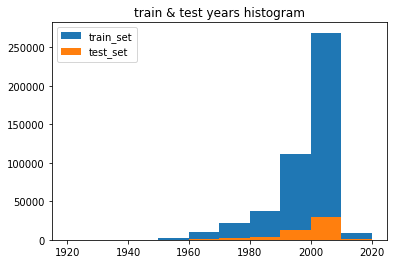

In [71]:
train_hist = np.array(trainYears) 
test_hist = np.array(testYears)
plt.hist(train_hist, bins = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020], label = 'train_set') 
plt.hist(test_hist, bins = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020], label = 'test_set')
plt.title( "train & test years histogram") 
plt.legend()
plt.show()

In [61]:
# Part 2 L2 Norm
np.random.seed(0)
wt2 = np.random.normal(size = (91,1))
sample_num = train_normed.shape[0]
decay_factor = 0.001
momentum = 0.05
learning_rate = 0.02
alpha = 0.1

train_loss_l2 = []
for e in range(1000):
    batch_loss = []
    idx = np.random.permutation(sample_num)
    x = train_normed[idx] 
    y = trainYears[idx]
    for i in range(0,sample_num,200):
        batchx = x[i:i+200]
        batchy = y[i:i+200]
        length = batchx.shape[0]
        y_gt = batchy.reshape((length,1))
        y_hat = np.dot(batchx,wt2)
        loss_sq = np.square(y_hat - y_gt)
        total_loss = (np.sum(loss_sq) + alpha * np.sum(wt2 ** 2))
        batch_loss.append(total_loss)
        dw = (2 / length) * (np.dot(batchx.T, (y_hat - y_gt)) + decay_factor * alpha * wt2)
        wt2 = wt2 - momentum * learning_rate * dw 
    ls = np.sum(batch_loss)/ len(batch_loss) 
    train_loss_l2.append(ls)

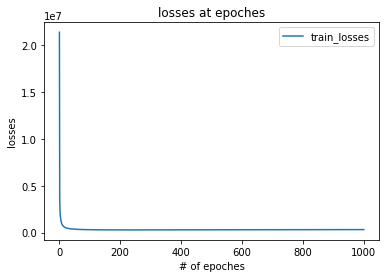

In [63]:
num_epoches = np.arange(1,1001) 
plt.plot(num_epoches, train_loss_l2, label = 'train_losses')
plt.xlabel('# of epoches') 
plt.ylabel('losses')
plt.title('losses at epoches') 
plt.legend()
plt.show()  

In [65]:
train_result_l2 = np.dot(train_normed, wt2)
test_result_l2 = np.dot(test_normed, wt2)
    
train_mse_l2 = musicMSE(train_result_l2,trainYears)
test_mse_l2 = musicMSE(test_result_l2,testYears)   
print(train_mse_l2,test_mse_l2)

[132.98656934] [130.0669572]


In [159]:
# Pseudo inverse method
inv_method = np.dot(train_normed.T,train_normed)
inv_it = np.linalg.inv(inv_method) 
pseudo_w = np.dot(np.dot(inv_it,train_normed.T),trainYears)
train_pseudo = np.dot(train_normed, pseudo_w)
test_pseudo = np.dot(test_normed, pseudo_w)
train_mse = musicMSE(train_pseudo,trainYears)
test_mse = musicMSE(test_pseudo,testYears)   
print(train_mse,test_mse)

91.34564333696343 90.5472399767577


In [66]:
# Part 3 L1 weight decay
np.random.seed(0)
wt1 = np.random.normal(size = (91,1))
decay_factor = 0.001
momentum = 0.05
learning_rate = 0.02
alpha = 0.1

train_loss_l1 = []
for e in range(1500):
    batch_loss_l1 = []
    idx = np.random.permutation(sample_num)
    x = train_normed[idx] 
    y = trainYears[idx]
    for i in range(0,sample_num,200):
        batchx = x[i:i+200]
        batchy = y[i:i+200]
        length = batchx.shape[0]
        y_gt = batchy.reshape((length,1))
        y_hat = np.dot(batchx,wt1)
        loss_sq = np.square(y_hat - y_gt)
        abst = np.absolute(wt1)
        total_loss = np.sum(loss_sq) + alpha * np.sum(abst)
        batch_loss_l1.append(total_loss)
        dw = (2 / length) * (np.dot(batchx.T,(y_hat - y_gt)) + decay_factor*alpha*np.ones(wt1.shape))
        wt1 = wt1 - momentum * learning_rate * dw 
    ls = np.sum(batch_loss_l1)/ len(batch_loss_l1) 
    train_loss_l1.append(ls)    

In [68]:
train_result_l1 = np.dot(train_normed, wt1)
test_result_l1 = np.dot(test_normed, wt1)
    
train_mse_l1 = musicMSE(train_result_l1,trainYears)
test_mse_l1 = musicMSE(test_result_l1,testYears)   
print(train_mse_l1,test_mse_l1)

[117.22092233] [115.40989735]


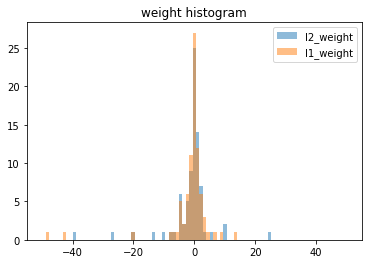

In [73]:
l2_hist = np.array(wt2) 
l1_hist = np.array(wt1)
plt.hist(l2_hist, bins = np.linspace(-50, 50, 90), alpha=0.5, label = 'l2_weight') 
plt.hist(l1_hist, bins = np.linspace(-50, 50, 90), alpha=0.5, label = 'l1_weight')
plt.title( "weight histogram") 
plt.legend()
plt.show()

In [138]:
# Part 4 Poisson regression             
np.random.seed(0)
w_psn = 0.001*np.random.normal(size = (91,1))
decay_factor = 0.001
momentum = 0.005
learning_rate = 0.00001
alpha = 0.1

train_loss_psn = []
for e in range(800):
    batch_loss_psn = []
    idx = np.random.permutation(sample_num)
    x = train_normed[idx] 
    y = trainYears[idx]
    for i in range(0,sample_num,1000):
        batchx = x[i:i+1000]
        batchy = y[i:i+1000]
        length = batchx.shape[0]
        y_gt = batchy.reshape((length,1))
        y_hat = np.dot(batchx,w_psn)
        diff = np.exp(y_hat) - y_gt * y_hat
        loss = np.sum(diff)
        batch_loss_psn.append(loss)

        dw_temp = np.exp(y_hat) - y_gt
        dw = (1/length)*np.dot(batchx.T, dw_temp)
    
        w_psn = w_psn - momentum * learning_rate * dw 
    ls = np.sum(batch_loss_psn)/ len(batch_loss_psn) 
    train_loss_psn.append(ls)                

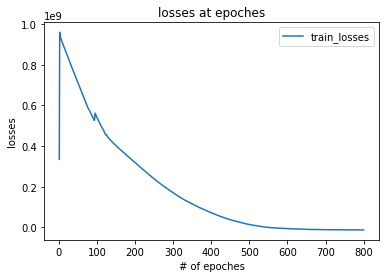

In [142]:
num_epoches = np.arange(1,801)
  
plt.plot(num_epoches, train_loss_psn, label = 'train_losses')
plt.xlabel('# of epoches') 
plt.ylabel('losses')
plt.title('losses at epoches') 
plt.legend()
plt.show()  

In [140]:
train_result_psn = np.dot(train_normed, w_psn)
test_result_psn = np.dot(test_normed, w_psn)
    
train_mse_psn = musicMSE(train_result_psn,trainYears)
test_mse_psn = musicMSE(test_result_psn,testYears)   
print(train_mse_psn,test_mse_psn)

[3965184.72627584] [3965572.49316289]


In [150]:
# One-Hot Encoding for Softmax
train_1hot = np.zeros((train_normed.shape[0],90))
test_1hot = np.zeros((test_normed.shape[0],90))
for i in range(train_normed.shape[0]):
    ind = int(trainYears[i] - 1922)
    train_1hot[i][ind]= 1
for i in range(test_normed.shape[0]):
    ind = int(testYears[i] - 1922)
    test_1hot[i][ind] = 1    

In [156]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis = 1).reshape(-1,1))
    summation = np.sum(e_x, axis = 1).reshape(-1,1)
    return e_x / summation 
    
def lossfunction(x,y):
    global w_sf
    global decay_factor_sf
    global learning_rate_sf
    num = x.shape[0]
    sc = np.dot(x, w_sf)
    y_hat = softmax(sc)
    loss = -np.log(y_hat) * y 
    l2reg = (0.5) * decay_factor_sf * np.sum(w_sf ** 2)
    total_loss = (np.sum(loss) / num) + l2reg
    dw = ((-1 / num) * np.dot(x.T, (y - y_hat)))                    
    return total_loss, dw

def SGDminiBatch(x,y):
    global w_sf
    global delta_w_sf
    global momentum_sf
    global batch_size_sf
    global learning_rate_sf
    idx = np.random.permutation(train_normed.shape[0])
    x = train_normed[idx]
    y = train_1hot[idx]
    losses = []
    for i in range(0,train_normed.shape[0],batch_size_sf):
        batchx = x[i:i+batch_size_sf]
        batchy = y[i:i+batch_size_sf]
        ls,dw = lossfunction(batchx,batchy)
        delta_w_sf = momentum_sf * delta_w_sf + learning_rate_sf * dw
        w_sf = w_sf - delta_w_sf
        losses.append(ls)
    return np.sum(losses)/ len(losses)

def trainModel(train_normed, train_1hot, test_normed, test_1hot):
    global w_sf
    global delta_w_sf
    global epoches_sf
    global learning_rate_sf
    train_losses = []
    for e in range(epoches_sf):
        train_loss = SGDminiBatch(train_normed,train_1hot)       
        train_losses.append(train_loss)
    return train_losses,w_sf 

global w_sf
global delta_w_sf
global epoches_sf
global momentum_sf
global batch_size_sf
global learning_rate_sf
global decay_factor_sf

np.random.seed(0)
delta_w_sf = np.zeros((91,90))
w_sf = np.random.normal(size = (91,90))
epoches_sf = 500             
batch_size_sf = 1000
decay_factor_sf = 0.0001
momentum_sf = 0.0005
learning_rate_sf = 0.001

train_losses,w_sf = trainModel(train_normed, train_1hot, test_normed, test_1hot)

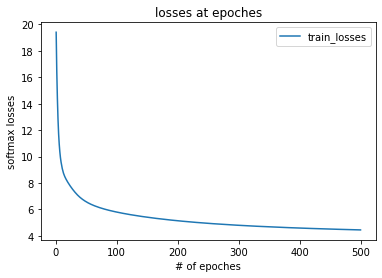

In [161]:
num_epoches = np.arange(1,501)
  
plt.plot(num_epoches, train_losses, label = 'train_losses')
plt.xlabel('# of epoches') 
plt.ylabel('softmax losses')
plt.title('losses at epoches') 
plt.legend()
plt.show()  

In [164]:
result_sf_tra = np.dot(train_normed, w_sf)
result_sf_tst = np.dot(test_normed, w_sf)

pd_tra = np.argmax(result_sf_tra, axis=1) + 1922
pd_tst = np.argmax(result_sf_tst, axis=1) + 1922

train_mse_sf = musicMSE(pd_tra,trainYears)
test_mse_sf = musicMSE(pd_tst,testYears)   
print(train_mse_sf,test_mse_sf)

204.0505439763648 197.88582219639744


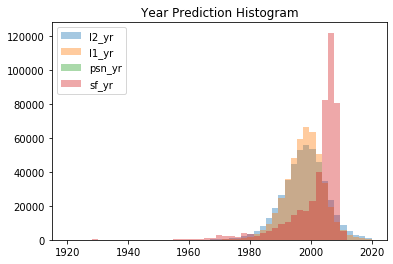

In [173]:
######## Year Prediction ##########
l2_yr = np.dot(train_normed,wt2)
l1_yr = np.dot(train_normed,wt1)
pn_yr = np.dot(train_normed,w_psn)
sf_idx = np.dot(train_normed,w_sf)
sf_yr = np.argmax(sf_idx, axis=1) + 1922

plt.hist(l2_yr, bins = np.linspace(1920, 2020, 50), alpha=0.4, label = 'l2_yr') 
plt.hist(l1_yr, bins = np.linspace(1920, 2020, 50), alpha=0.4, label = 'l1_yr')
plt.hist(pn_yr, bins = np.linspace(1920, 2020, 50), alpha=0.4, label = 'psn_yr')
plt.hist(sf_yr, bins = np.linspace(1920, 2020, 50), alpha=0.4, label = 'sf_yr') 
plt.title( "Year Prediction Histogram") 
plt.legend()
plt.show()

In [210]:
import collections
yr_count = np.array(trainYears)
yr_freq = collections.Counter(yr_count)

def accu_per_year(x,gt):
    yr = np.zeros((90,1))
    for i in range(1922,2012):
        num = yr_freq[i]
        if num > 0:
            get_idx = np.where(gt == i)
            idx_cl = np.array(get_idx).reshape((-1,1))
            get_y = gt[idx_cl]
            get_yhat = x[idx_cl]
            accu = np.sum(get_y == get_yhat)/num
            yr[i-1922] = accu
    return yr        

lg = len(trainYears)
l2_yrs = np.rint(l2_yr).reshape((lg,))
l2_accu = accu_per_year(l2_yrs,trainYears)
l1_yrs = np.rint(l1_yr).reshape((lg,))
l1_accu = accu_per_year(l1_yrs,trainYears)
sf_yrs = np.rint(sf_yr).reshape((lg,))
sf_accu = accu_per_year(sf_yrs,trainYears)    

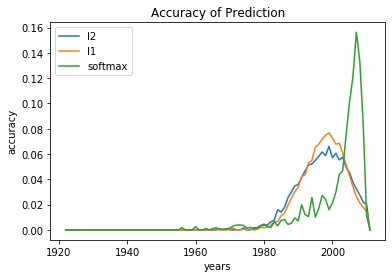

In [217]:
all_years = np.arange(1922,2012)
a = l2_accu
b = l1_accu
c = sf_accu 
plt.plot(all_years, a, label = 'l2')
plt.plot(all_years, b, label = 'l1')
plt.plot(all_years, c, label = 'softmax')
plt.xlabel('years') 
plt.ylabel('accuracy')
plt.title('Accuracy of Prediction') 
plt.legend()
plt.show()  